In [2]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import statistics
from sklearn.metrics import mean_squared_error, mean_absolute_error
%matplotlib inline

In [7]:
df = pd.read_excel('C:/Users/User/Downloads/case1.xlsx', 'Заказы')
df.head()

,Номер заказа,Вес груза,День,Количество коробок,Город отправки,Город доставки
0,22,1122.21,1,157,Таллин,Санкт-Петербург
1,37,1110.50,1,148,Рига,Санкт-Петербург
2,64,1165.27,1,153,Москва,Рига
3,95,1157.63,1,153,Таллин,Санкт-Петербург
4,105,1000.52,1,145,Вильнюс,Санкт-Петербург


In [8]:
data = pd.read_excel('C:/Users/User/Downloads/case1.xlsx', 'Коробки по заказам')
data.head()

,Номер коробки,Номер заказа,Вес коробки
0,1,1,5.88
1,2,1,5.69
2,3,1,3.69
3,4,1,5.56
4,5,1,3.45


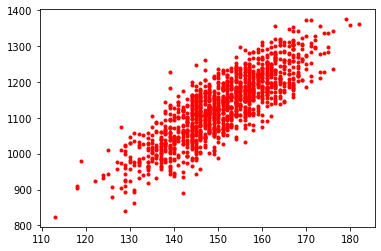

In [31]:
x = df['Количество коробок']
y = df['Вес груза']
plt.scatter(x, y, marker='.', facecolor='r')

на графике видно, что при количестве коробок 140 вес груза не превышает веса 1,2 т

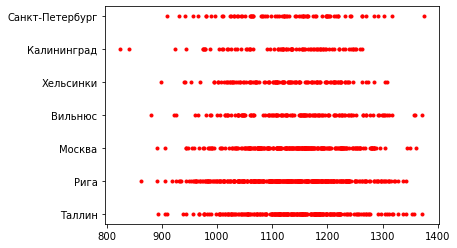

In [33]:
x = df['Вес груза']
y = df['Город отправки']
plt.scatter(x, y, marker='.', facecolor='r')

на графике видно, что примерно 60% заказов в городе Таллин имеют вес груза меньше, чем 1,2 т

In [40]:
df['Количество коробок'].quantile([0.1,0.13,0.15,0.17,0.25,0.5])

0.10    138.0
0.13    139.0
0.15    140.0
0.17    141.0
0.25    144.0
0.50    151.0
Name: Количество коробок, dtype: float64

путем подбора параметра пришли к выводу, что 15% заказов имеют количество коробок равное 140 без учета веса груза и города отправки

In [88]:
t1 = order[order['Количество коробок'] < 141]
t1['Вес груза'].quantile([0.9969, 1.00])

0.9969    1199.777696
1.0000    1227.330000
Name: Вес груза, dtype: float64

зная то, что количество коробок 140, вычислили, что в 99,69% вес заказов не превышает 1,2 т

In [89]:
t1 = order[(order['Город отправки'] == 'Таллин') & (order['Количество коробок'] < 141)]
t1['Вес груза'].quantile([1.00])

1.0    1184.6
Name: Вес груза, dtype: float64

получили, что в 100% случаев, при городе отправки Таллин и количестве коробок 140, вес груза не превышает 1,2 т